In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading in the data
general_data = pd.read_csv("../population-segmentation-data/general_data.csv", sep=";")
customer_data = pd.read_csv("../population-segmentation-data/customer_data.csv", sep=";")
train_data = pd.read_csv("../population-segmentation-data/train_data.csv", sep=";")
test_data = pd.read_csv("../population-segmentation-data/test_data.csv", sep=";")

In [3]:
customer_data.head()

,Unnamed: 0,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,...,WOHNLAGE,ZABEOTYP,ONLINE_PURCHASE,ANREDE_KZ,ALTERSKATEGORIE_GROB,SINGLE_BUYER,MULTI_BUYER,COSMETIC_AND_FOOD,COSMETIC,FOOD
0,0,2,1.0,10.0,10.0,1.0,0.0,0.0,2.0,1.0,...,7.0,3,0,1,4,0,1,1,0,0
1,1,-1,9.0,11.0,-1.0,-1.0,-1.0,0.0,3.0,-1.0,...,-1.0,3,0,1,4,1,0,0,0,1
2,2,-1,1.0,6.0,0.0,1.0,0.0,0.0,1.0,1.0,...,2.0,3,0,2,4,0,1,1,0,0
3,3,1,1.0,8.0,8.0,0.0,-1.0,0.0,0.0,1.0,...,7.0,1,0,1,4,0,1,0,1,0
4,4,-1,1.0,20.0,14.0,7.0,0.0,0.0,4.0,7.0,...,3.0,1,0,1,3,0,1,0,0,1


In [4]:
# Getting the name of the first column
extra_col = list(general_data.columns)[0]
print(extra_col)

# Removing the extra column in every dataframe since it is redundant
general_data.drop(extra_col, axis=1, inplace=True)
customer_data.drop(extra_col, axis=1, inplace=True)
train_data.drop(extra_col, axis=1, inplace=True)
test_data.drop(extra_col, axis=1, inplace=True)

Unnamed: 0


In [5]:
customer_data.head()

,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,...,WOHNLAGE,ZABEOTYP,ONLINE_PURCHASE,ANREDE_KZ,ALTERSKATEGORIE_GROB,SINGLE_BUYER,MULTI_BUYER,COSMETIC_AND_FOOD,COSMETIC,FOOD
0,2,1.0,10.0,10.0,1.0,0.0,0.0,2.0,1.0,0.0,...,7.0,3,0,1,4,0,1,1,0,0
1,-1,9.0,11.0,-1.0,-1.0,-1.0,0.0,3.0,-1.0,0.0,...,-1.0,3,0,1,4,1,0,0,0,1
2,-1,1.0,6.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,2.0,3,0,2,4,0,1,1,0,0
3,1,1.0,8.0,8.0,0.0,-1.0,0.0,0.0,1.0,0.0,...,7.0,1,0,1,4,0,1,0,1,0
4,-1,1.0,20.0,14.0,7.0,0.0,0.0,4.0,7.0,0.0,...,3.0,1,0,1,3,0,1,0,0,1


In [6]:
# Normalzing the data so that every column is on a 0 to 1 scale

# Importing the scaler
from sklearn.preprocessing import MinMaxScaler

# Creating the scaler
scaler = MinMaxScaler()

# Fitting the scaler to the customer data and transforming
customer_data_scaled = scaler.fit_transform(customer_data)

In [7]:
# import the PCA class from scikit learn
from sklearn.decomposition import PCA

# Defining the maximum number of principal components to fit the model
num_components = len(list(customer_data.columns)) - 1

# Creating a PCA model
pca = PCA(n_components=num_components)

# Fitting the PCA model
pca.fit(customer_data_scaled)

PCA(copy=True, iterated_power='auto', n_components=363, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [10]:
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)

[5.50444166e-01 4.13043542e-02 2.44893077e-02 1.95814997e-02
 1.68829647e-02 1.52744762e-02 1.38610803e-02 1.07930161e-02
 9.96348166e-03 8.64273966e-03 7.85144270e-03 7.46544275e-03
 7.25089390e-03 5.40795060e-03 5.23551043e-03 4.86095110e-03
 4.65122892e-03 4.19547966e-03 4.01260790e-03 3.94345652e-03
 3.82477934e-03 3.78297882e-03 3.67448924e-03 3.60491687e-03
 3.55511107e-03 3.53368142e-03 3.46140981e-03 3.43533795e-03
 3.32341535e-03 3.26013278e-03 3.22219077e-03 3.11569910e-03
 3.04040447e-03 2.90129704e-03 2.75693114e-03 2.70701525e-03
 2.63779741e-03 2.62022772e-03 2.55234215e-03 2.49869568e-03
 2.45067666e-03 2.42886444e-03 2.36598744e-03 2.32454376e-03
 2.29541145e-03 2.27781924e-03 2.22781028e-03 2.20845930e-03
 2.17455567e-03 2.15014798e-03 2.11656893e-03 2.09935817e-03
 2.07032699e-03 2.00577588e-03 1.93197990e-03 1.90023139e-03
 1.88952641e-03 1.83282127e-03 1.81903803e-03 1.77718764e-03
 1.74807615e-03 1.73309576e-03 1.71643709e-03 1.67482060e-03
 1.66731654e-03 1.647914

In [11]:
# Getting an array of the cumulative sum of explained variance ratios in order to visualize the number of components needed
explained_var_cumulative = np.cumsum(explained_variance_ratio)

In [12]:
# Creating the x-axis for the plot of the explained variance over the number of components plot
x_axis = [*range(1, len(explained_var_cumulative)+1)]

Text(0, 0.5, 'Cumulative Variance')

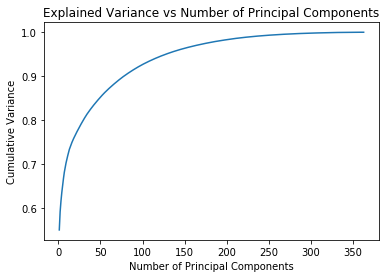

In [13]:
# Creating the plot for the explained variance over the number of components plot
plt.plot(x_axis, explained_var_cumulative)
plt.title("Explained Variance vs Number of Principal Components")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Variance")

Text(0, 0.5, 'Cumulative Variance')

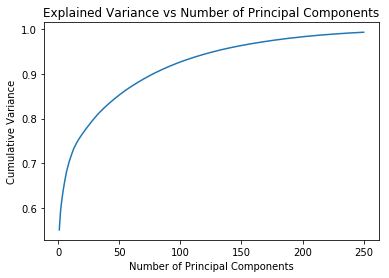

In [14]:
# Decreasing the number of principal components in order to see the elbow more clearly
plt.plot(x_axis[:250], explained_var_cumulative[:250])
plt.title("Explained Variance vs Number of Principal Components")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Variance")

In [15]:
print(explained_var_cumulative[100])

0.9276566172565575


In [16]:
# Reducing the dimensionality of the data using 100 principal components
pca_100 = PCA(n_components=100)
customer_data_reduced = pca_100.fit_transform(customer_data_scaled)

In [17]:
print(customer_data_reduced[:5])

[[-2.74897068e+00 -6.83000692e-01 -1.75307230e+00 -8.73160554e-01
   8.96470560e-04 -1.08474240e-01  3.67912667e-01 -1.31982431e-01
  -3.27102297e-01  2.36313034e-01 -1.23439955e-01 -1.52733152e-01
   6.90759261e-02 -3.30048833e-01  1.33098353e-01  2.38800146e-01
  -7.97460701e-02  2.77453480e-01 -4.70863958e-02  2.88848205e-01
  -1.95306671e-02 -3.39352347e-01  8.52590385e-01  3.85196455e-01
  -5.62155088e-01  3.15505798e-01  4.03058156e-01  5.33252675e-02
   6.02875509e-01 -2.47040657e-01  6.66962154e-02 -3.95357476e-01
   3.23058641e-01 -2.72177585e-01  1.81649563e-01 -8.40441222e-03
   2.00035260e-01 -1.33495142e-01 -3.21778573e-01 -2.41985058e-02
   6.28191724e-02 -2.27305910e-01 -3.41222989e-01  3.61317769e-01
  -1.11297458e-01 -1.08685323e-01 -1.00675760e-01  4.56138199e-01
  -7.98644338e-02 -2.27400173e-01 -2.25817041e-01 -4.89419410e-01
   1.61372047e-01  1.02198240e-01 -6.34419928e-02  2.43331908e-01
  -2.73984247e-02  1.58143449e-01 -1.51903009e-01 -1.02798623e-01
   6.99305

In [19]:
# Creating a dataframe that contains the correlations between a principal component and the features
component_makeup = pd.DataFrame(pca_100.components_, columns=customer_data.columns, index=[*range(1, 101)])

In [20]:
component_makeup.head()

,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,...,WOHNLAGE,ZABEOTYP,ONLINE_PURCHASE,ANREDE_KZ,ALTERSKATEGORIE_GROB,SINGLE_BUYER,MULTI_BUYER,COSMETIC_AND_FOOD,COSMETIC,FOOD
1,-0.044586,-0.026148,-0.057094,-0.041952,-0.001072,-0.004521,-0.012492,-0.015285,-0.001429,-0.016820,...,-0.054918,0.014415,0.001432,0.020567,-0.022343,0.005284,-0.005284,-0.004831,0.001967,0.002864
2,-0.018081,-0.017172,0.105949,0.052613,-0.005026,-0.001714,0.011464,0.028992,-0.006739,0.001624,...,0.012532,-0.059281,0.035009,-0.081829,-0.008442,0.061430,-0.061430,-0.067484,0.023480,0.044005
3,-0.050082,0.025662,0.029079,0.038009,0.004502,0.001089,0.004419,-0.005786,0.005740,-0.001056,...,0.005942,0.079637,0.035614,0.257415,-0.016591,0.353961,-0.353961,-0.364140,0.118958,0.245182
4,-0.031476,0.025673,0.037885,0.031912,0.005930,0.002091,0.006614,0.002151,0.007623,0.001844,...,-0.034156,0.062655,0.038975,0.110662,-0.017704,-0.357491,0.357491,0.371883,-0.148282,-0.223602
5,0.074601,-0.001698,-0.016877,-0.011225,0.003957,0.002672,-0.004640,0.000943,0.005174,0.003901,...,-0.140087,-0.024926,0.005656,-0.142243,0.006864,0.103524,-0.103524,-0.126744,0.121449,0.005295


In [22]:
# Making sure all 100 principal components are in the dataframe
len(component_makeup.index)

100

In [23]:
# Finding the most influential features of every principal component

# Dictionary that will hold the names of the most important features for every principal component
important_features_dict = {}

# Counter for the row index
i = 1
# Iterate through all the principal components
for i in range(1, 101):
    # Adding a key for the principal component
    new_key = "PC" + str(i)
    # Creating an empty list for the component
    important_features_dict[new_key] = []
    # Iterate through all the columns
    for feature in component_makeup.columns:
        # Add the name of the column and correlation coefficient if there is a strong correlation
        if component_makeup.loc[i, feature] >= 0.2 or component_makeup.loc[i, feature] <= -0.2:
            important_features_dict[new_key].append((feature, component_makeup.loc[i, feature]))

In [24]:
print(important_features_dict)

{'PC1': [], 'PC2': [('D19_GESAMT_ONLINE_QUOTE_12', 0.20151695048433943)], 'PC3': [('ANREDE_KZ', 0.25741455615735376), ('SINGLE_BUYER', 0.3539614558200136), ('MULTI_BUYER', -0.35396145582001354), ('COSMETIC_AND_FOOD', -0.3641400845167872), ('FOOD', 0.24518237000366463)], 'PC4': [('SINGLE_BUYER', -0.35749135728293074), ('MULTI_BUYER', 0.35749135728293074), ('COSMETIC_AND_FOOD', 0.3718834936639707), ('FOOD', -0.22360191966443996)], 'PC5': [('GREEN_AVANTGARDE', 0.23376135915141252)], 'PC6': [('SEMIO_ERL', 0.2159783720197676), ('SEMIO_FAM', -0.21518009556373197), ('SEMIO_KULT', -0.24220188327780356), ('ANREDE_KZ', 0.41369647758290207)], 'PC7': [('ANREDE_KZ', 0.24061059259133605)], 'PC8': [], 'PC9': [('D19_GESAMT_ONLINE_QUOTE_12', -0.2011309340812909), ('LP_FAMILIE_FEIN', 0.38092765541222323), ('LP_FAMILIE_GROB', 0.33142952559843436), ('LP_LEBENSPHASE_FEIN', 0.30848735650710746), ('LP_LEBENSPHASE_GROB', 0.3280559208588969)], 'PC10': [('LP_LEBENSPHASE_FEIN', -0.2077456117799266), ('LP_LEBENSP